## Decision Tree Classifier - Binary Classification Model

**Dataset:** Heart Disease
 > **Author:** Prasad Desai
### Objective: 
The Heart Disease dataset is a multiclass classification problem, The dataset is target feature is classified into 5 classes, but the classes 1,2,3 and 4 are not classified into any stages of the disease, so we will check and work on the dataset if the it works with the binary classification, we will merge the classes into one class, the features based on the 12 inputs. The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results. Using Evaluation Matrics, Accuracy Score, precision score, F1 score, ROC AUC score, confusion matrics and classification report.

### Dataset Description:

<table>
  <tr>
    <th>Features</th>
    <th>Feature Description</th>
  </tr>
  <tr>
    <td>age</td>
    <td>Age in years</td>
  </tr>
  <tr>
    <td>sex</td>
    <td>Gender : Male - 1, Female -0 </td>
  </tr>
  <tr>
    <td>cp</td>
    <td>Chest pain type</td>
  </tr>
  <tr>
    <td>trestbps</td>
  	<td>Resting blood pressure</td>
  </tr>
  <tr>
    <td>chol</td>
  	<td>cholesterol measure</td>
  </tr>
  <tr>
    <td>fbs</td>
  	<td>(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</td>
  </tr>
  <tr>
    <td>restecg</td>
  	<td>ecg observation at resting condition,   -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</td>
  </tr>
  <tr>
    <td>thalch</td>
  	<td>maximum heart rate achieved</td>
  </tr>
  <tr>
    <td>exang</td>
  	<td>exercise induced angina</td>
  </tr>
  <tr>
    <td>oldpeak</td>
  	<td>ST depression induced by exercise relative to rest</td>
  </tr>
  <tr>
    <td>slope</td>
  	<td>the slope of the peak exercise ST segment</td>
  </tr>
  <tr>
    <td>thal</td>
  	<td>Thal</td>
  </tr>
  <tr>
    <td>num</td>
  	<td>target [0=no heart disease: classify the data distribution based on the data as bwlow
es of heart disease ]</td>
  </tr>
</table> </tr>
</table>


Since it is a multiclass classification problem, we can classify the data distribution based on the data as below, 
The 2,3 and 4 classses are not classified separately, we can consider these as patients having heart disease and merge them too the 1's and make it binary classification.
This will also help in balancing a dataset as the data is distributed in four different classes for patient having a heart diseasee</td>
  </tr>
</table>

### Importing required Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Dataset

In [160]:
data = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
data

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping             normal    4  
904     120   True      3.0         flat       fixed defect    4  
905     123   True      2.5  downsloping             normal    4  
906     105   TURE      NaN  downsloping       fixed defect    4  
907     182  FALSE      NaN         flat  reversable defect    4  

[908 rows x 13 columns]

### Data Preprocessing

In [161]:
data.shape

(908, 13)

In [162]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [164]:
data = data.rename(columns={'num':'heart_disease'})

In [165]:
data

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  heart_disease  
0       150  False      2.3  downsloping       fixed defect              0  
1       132  False      0.0         flat       fixed defect              0  
2       148  False      0.4         flat       fixed defect              0  
3       190  False      0.0         flat       fixed defect              0  
4       126   True      1.5         flat       fixed defect              0  
..      ...    ...      ...          ...                ...            ...  
903     120  False      1.5    upsloping             normal              4  
904     120   True      3.0         flat       fixed defect              4  
905     123   True      2.5  downsloping             normal              4  
906     105   TURE      NaN  downsloping       fixed defect              4  
907     182  FALSE      NaN         flat  reversable defect              4  

[908 rows x 13 columns]

In [166]:
data['sex'].value_counts()

sex
Male      718
Female    190
Name: count, dtype: int64

In [167]:
data['cp'].value_counts()

cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

In [168]:
data['slope'].value_counts()

slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64

In [169]:
data['restecg'].value_counts()

restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

In [170]:
data['thal'].value_counts()

thal
normal               370
reversable defect    344
fixed defect         194
Name: count, dtype: int64

In [171]:
data.describe()

age    trestbps        chol      thalch     oldpeak  \
count  908.000000  908.000000  908.000000  908.000000  846.000000   
mean    53.791850  133.430617  201.484581  135.957048    0.891253   
std      9.158031   20.401608  112.097949   26.804929    1.093875   
min     29.000000    0.000000    0.000000   60.000000   -2.600000   
25%     47.750000  120.000000  176.750000  118.000000    0.000000   
50%     54.000000  130.000000  224.000000  138.000000    0.500000   
75%     60.000000  144.000000  270.000000  156.000000    1.500000   
max     77.000000  200.000000  603.000000  202.000000    6.200000   

       heart_disease  
count     908.000000  
mean        1.008811  
std         1.144436  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         2.000000  
max         4.000000

In [172]:
# Summerizing Data
data.describe(include=object)

sex            cp restecg  exang slope    thal
count    908           908     908    908   908     908
unique     2             4       3      4     3       3
top     Male  asymptomatic  normal  False  flat  normal
freq     718           495     542    516   453     370

### Missing Values imputation

In [173]:
# Check for missing values, outliers, and inconsistencies in the data.
data.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalch            0
exang             0
oldpeak          62
slope             0
thal              0
heart_disease     0
dtype: int64

**Key Insights :**
* We can see the feature oldpeak have 62 missing values, we will replace these missing values with mean of the feature

In [174]:
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].mean())

In [175]:
data.isna().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalch           0
exang            0
oldpeak          0
slope            0
thal             0
heart_disease    0
dtype: int64

### Visualization

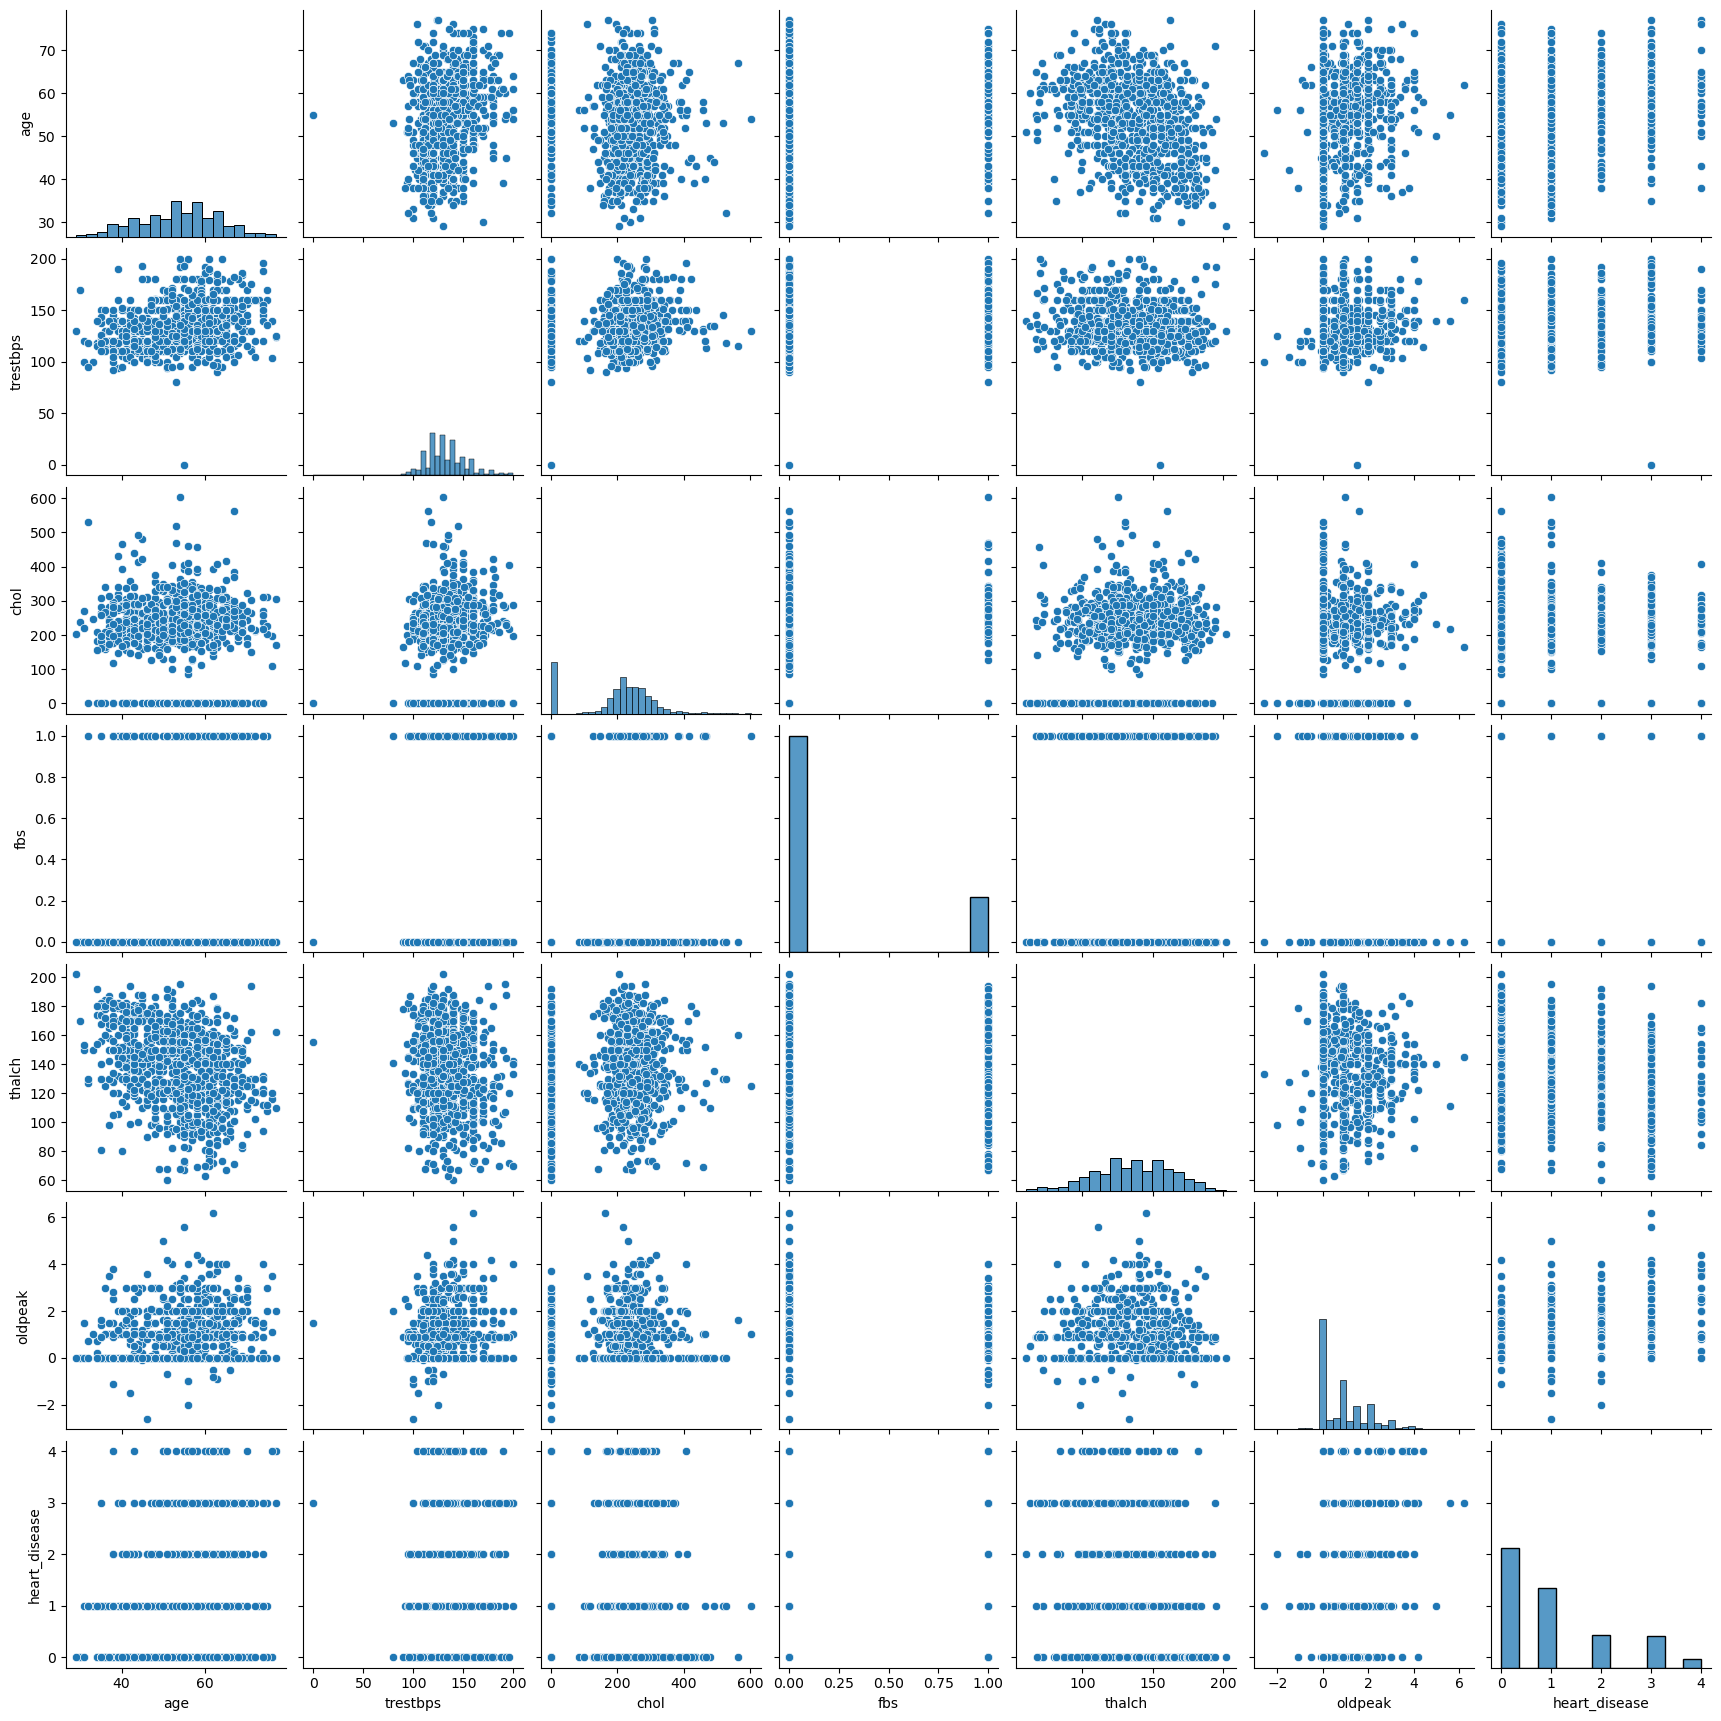

In [176]:
## Checking the Distirubution of the data 
sns.pairplot(data)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'heart_disease'}>]], dtype=object)

<Figure size 1400x700 with 0 Axes>

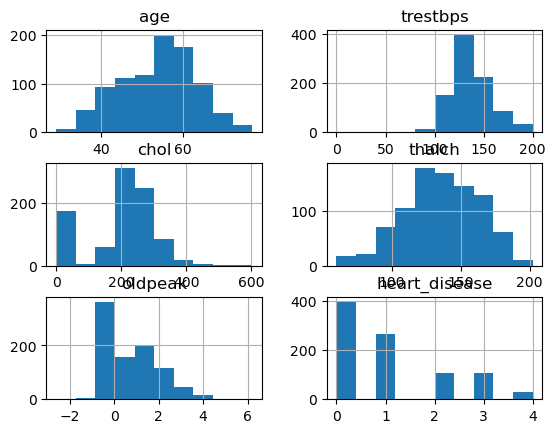

In [177]:
plt.figure(figsize=(14,7))
data.hist()

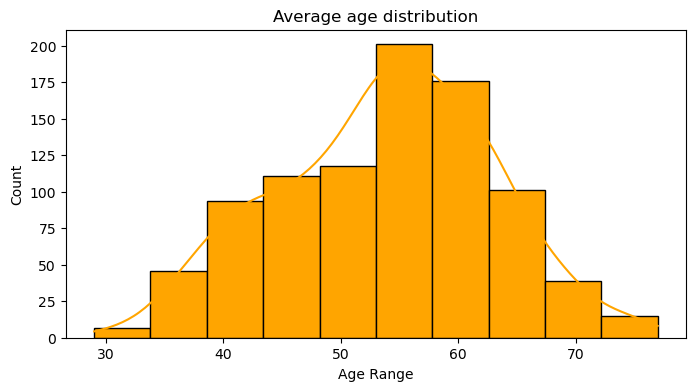

In [178]:
plt.figure(figsize=(8,4))
sns.histplot(data['age'], kde=True, bins=10, alpha=1, color='Orange')
plt.title('Average age distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

**Observation :**
* We can see the maximum count of the people from the age range 50 - 65 are most likely suffering from the heart disease
* The peak range is 55 years age

### Multi class to binary data conversion

In [179]:
data['heart_disease'].value_counts()

heart_disease
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

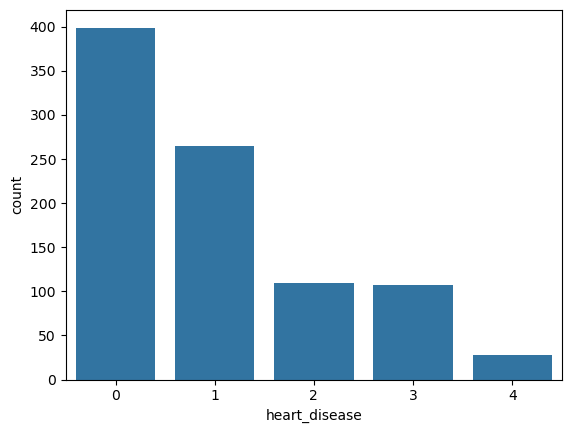

In [180]:
sns.countplot(x=data['heart_disease'])
plt.show()

**Observation :** 
* Since it is a multiclass classification problem, by counting the target features data distribution using a count plot
* There is more count of the people having no heart disease as 0's and following having mild disease as 1's
* Most of the data is distributed among 0's and 1's
* The 2,3 and 4 classses are not classified separately, we ca consider these as patients having heart disease and merge them too the 1's and make it binary classification.
* There is approximately similar count of people having moderate disease as 2's and severe disease as 3's
* Very less number of people have very severe disease as 4's
* So we will convert this multiclass classifiaction to binary class classification, by considering 0 as no disease and 1-4 as one class for patient is suffering from any stage of heart disease.
* This will also help in balancing a dataset as the data is distributed in four different classes for patient having a heart disease

In [181]:
# Convert multiclass to binary: 0 = no disease, 1 = any stage of disease
data['heart_disease'] = data['heart_disease'].replace({1: 1, 2: 1, 3: 1, 4: 1})

In [182]:
data['heart_disease'].value_counts()

heart_disease
1    509
0    399
Name: count, dtype: int64

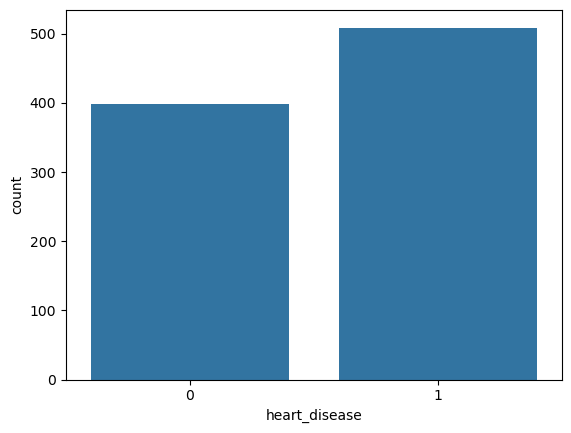

In [183]:
sns.countplot(x=data['heart_disease'])
plt.show()

**Observation :**
* We have converted the multiclass to binary class for target variable

<Axes: xlabel='thalch', ylabel='age'>

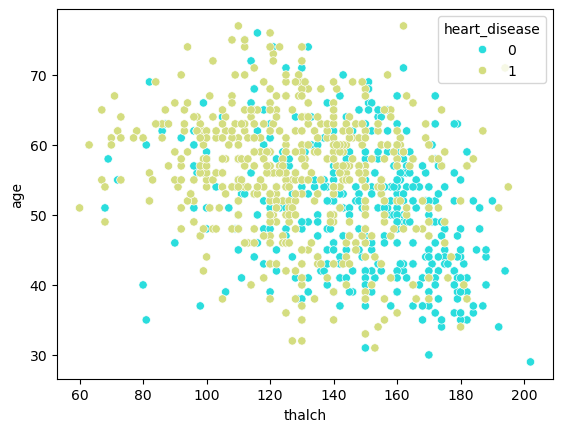

In [184]:
sns.scatterplot(data=data, x=data['thalch'], y=data['age'], hue=data['heart_disease'], palette='rainbow')

<Axes: >

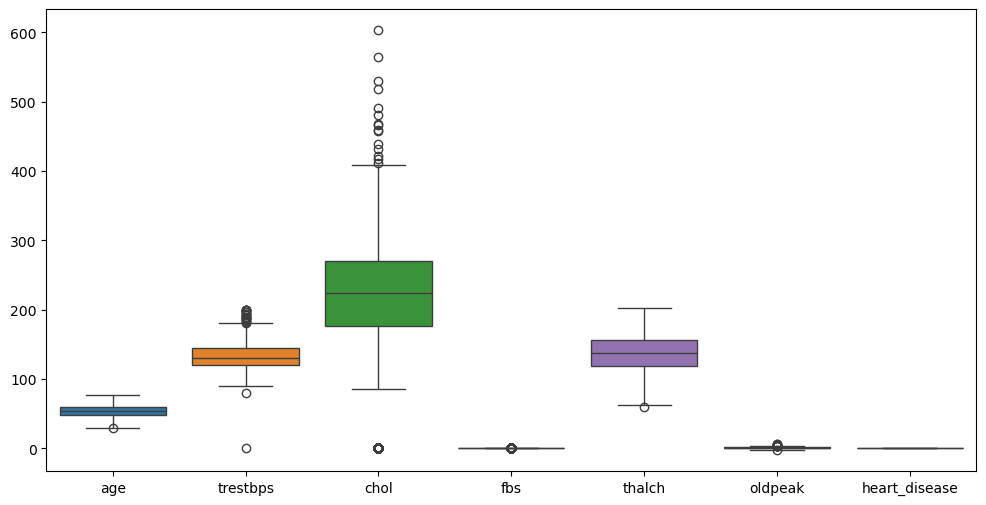

In [185]:
## Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x19fb4527560>,
 'caps': [<matplotlib.lines.Line2D at 0x19fb4536810>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fb45360c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19fb4536e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fb45373b0>],
 'means': [<matplotlib.lines.Line2D at 0x19fb45370e0>]}

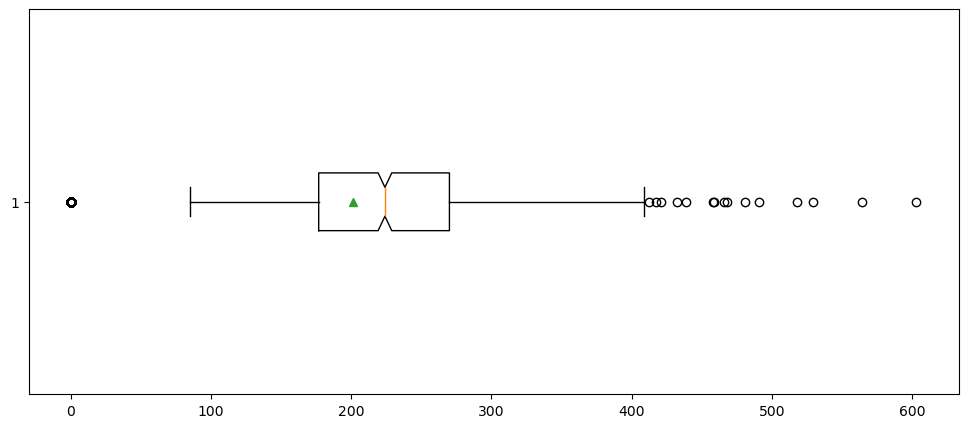

In [186]:
plt.figure(figsize=(12,5))
plt.boxplot(x=data['chol'], notch=True, vert=False, showmeans=True)

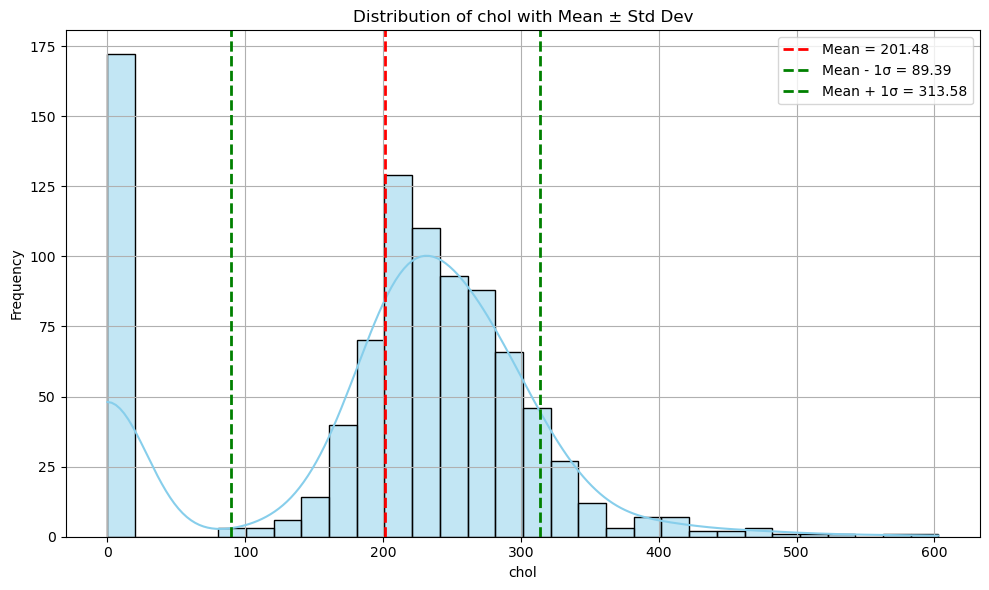

In [187]:
# Choose a numerical column to visualize (e.g., 'age' or 'chol')
col = 'chol'

# Compute mean and std
mean = data[col].mean()
std = data[col].std()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data[col], kde=True, bins=30, color='skyblue', edgecolor='black')

# Add vertical lines for mean and ± std
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.2f}')
plt.axvline(mean - std, color='green', linestyle='--', linewidth=2, label=f'Mean - 1σ = {mean - std:.2f}')
plt.axvline(mean + std, color='green', linestyle='--', linewidth=2, label=f'Mean + 1σ = {mean + std:.2f}')

# Labels and title
plt.title(f'Distribution of {col} with Mean ± Std Dev')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations :**
* The box plot and the histogram for cholesterol feature depicts that the data is distributed towoards positive side and there is presence of outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x19fb4695220>,
 'caps': [<matplotlib.lines.Line2D at 0x19fb4695790>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fb4694fb0>],
 'medians': [<matplotlib.lines.Line2D at 0x19fb4695bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fb4696060>],
 'means': [<matplotlib.lines.Line2D at 0x19fb4695e50>]}

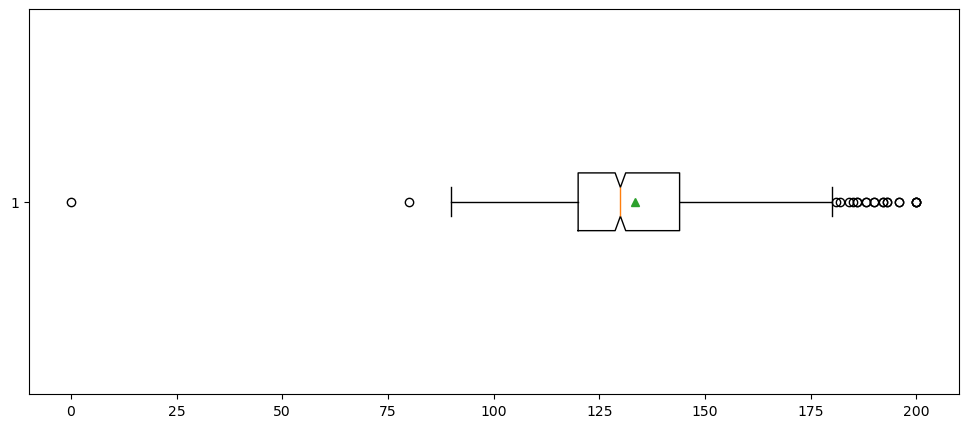

In [188]:
plt.figure(figsize=(12,5))
plt.boxplot(x=data['trestbps'], notch=True, vert=False, showmeans=True)

**Observation :**
* We can see from the boxplot there is presence of outliers in trestbps, fbs, chol, and oldpeak
* We will treat outliers in required columns
* Also the range of the data distributed is different, so the data needs to be scaled into a standard scale


In [189]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'heart_disease'],
      dtype='object')

In [190]:
data.dtypes

age                int64
sex               object
cp                object
trestbps           int64
chol               int64
fbs                 bool
restecg           object
thalch             int64
exang             object
oldpeak          float64
slope             object
thal              object
heart_disease      int64
dtype: object

In [191]:
data['fbs'].value_counts()

fbs
False    723
True     185
Name: count, dtype: int64

In [192]:
data['fbs'].mode()

0    False
Name: fbs, dtype: bool

**Obserations :**
* Before treating the outliers lets convert fbs column and exang column from boolean true and false to 0s and 1s
* Converting Categorical columns to numerical form, Boolean columns from True to 1's and False to 0's
* Where as Sex column also have only male and female binary values so converting it to Male as 1's and Female as 0's 

### Data Preparations and Type Conversion

In [193]:
# Updating the boolean datatypes True with 1's and False with 0's
data['fbs'] = data['fbs'].replace({False:0, True:1})
data['exang'] = data['exang'].replace({True: 1, False: 0})

C:\Users\User\AppData\Local\Temp\ipykernel_1208\2935053836.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fbs'] = data['fbs'].replace({False:0, True:1})


In [194]:
data['sex'] = data['sex'].replace({'Male': 1, 'Female': 0})

C:\Users\User\AppData\Local\Temp\ipykernel_1208\3909824581.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'Male': 1, 'Female': 0})


In [195]:
data

age  sex               cp  trestbps  chol  fbs           restecg  thalch  \
0     63    1   typical angina       145   233    1    lv hypertrophy     150   
1     41    1  atypical angina       135   203    0            normal     132   
2     57    1     asymptomatic       140   192    0            normal     148   
3     52    1   typical angina       118   186    0    lv hypertrophy     190   
4     57    1     asymptomatic       110   201    0            normal     126   
..   ...  ...              ...       ...   ...  ...               ...     ...   
903   53    1     asymptomatic       125     0    0            normal     120   
904   62    1     asymptomatic       166   170    0  st-t abnormality     120   
905   56    1      non-anginal       170     0    0    lv hypertrophy     123   
906   56    1      non-anginal       144   208    1  st-t abnormality     105   
907   57    1     asymptomatic       142   277    1  st-t abnormality     182   

     exang   oldpeak        slope               thal  heart_disease  
0        0  2.300000  downsloping       fixed defect              0  
1        0  0.000000         flat       fixed defect              0  
2        0  0.400000         flat       fixed defect              0  
3        0  0.000000         flat       fixed defect              0  
4        1  1.500000         flat       fixed defect              0  
..     ...       ...          ...                ...            ...  
903      0  1.500000    upsloping             normal              1  
904      1  3.000000         flat       fixed defect              1  
905      1  2.500000  downsloping             normal              1  
906   TURE  0.891253  downsloping       fixed defect              1  
907  FALSE  0.891253         flat  reversable defect              1  

[908 rows x 13 columns]

In [196]:
data.dtypes

age                int64
sex                int64
cp                object
trestbps           int64
chol               int64
fbs                int64
restecg           object
thalch             int64
exang             object
oldpeak          float64
slope             object
thal              object
heart_disease      int64
dtype: object

**Observations :**
* Here we can still see the values in the exang column in the row 906 and 907 misspelled and after encoding the True to 1's and False to 0's it is still showing the datatype for exang column as object.
So we will need to replace these misspelled data to correct format using replace method

In [197]:
data['exang'] = data['exang'].replace({'TURE':1, 'FALSE':0})

C:\Users\User\AppData\Local\Temp\ipykernel_1208\3330550496.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['exang'] = data['exang'].replace({'TURE':1, 'FALSE':0})


In [198]:
data.dtypes

age                int64
sex                int64
cp                object
trestbps           int64
chol               int64
fbs                int64
restecg           object
thalch             int64
exang              int64
oldpeak          float64
slope             object
thal              object
heart_disease      int64
dtype: object

**Observations :**
* After converting the fbs, exang and sex columns to 1's and 0's numerical format it changed the datatypes for the columns from object to int type.
* Now we have cp, restecg, slope and thal columns in categorical format, the columns specifies more than 2 values. We will convert these columns using label enconding technique 

## Feature Engineering:

### Label Encoding Technique

* Features cp, restecg, slope and thal are the categorical columns, which are classified into almost 3 to 4 classes each
* As these are also important feaures, we will encode them using a label encoding technique
* We can also see the map the labels encoded values

In [199]:
from sklearn.preprocessing import LabelEncoder

In [200]:
le = LabelEncoder()

In [201]:
data['cp'] = le.fit_transform(data['cp'])

In [202]:
## Checking the label encoder columns values mapping
dict(zip(le.classes_, le.transform(le.classes_)))

{'asymptomatic': 0,
 'atypical angina': 1,
 'non-anginal': 2,
 'typical angina': 3}

In [203]:
data['restecg'] = le.fit_transform(data['restecg'])

In [204]:
## Checking the label encoder columns values mapping
dict(zip(le.classes_, le.transform(le.classes_)))

{'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2}

In [205]:
data['slope'] = le.fit_transform(data['slope'])

In [206]:
## Checking the label encoder columns values mapping
dict(zip(le.classes_, le.transform(le.classes_)))

{'downsloping': 0, 'flat': 1, 'upsloping': 2}

In [207]:
data['thal'] = le.fit_transform(data['thal'])

In [208]:
## Checking the label encoder columns values mapping
dict(zip(le.classes_, le.transform(le.classes_)))

{'fixed defect': 0, 'normal': 1, 'reversable defect': 2}

In [209]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang   oldpeak  \
0     63    1   3       145   233    1        0     150      0  2.300000   
1     41    1   1       135   203    0        1     132      0  0.000000   
2     57    1   0       140   192    0        1     148      0  0.400000   
3     52    1   3       118   186    0        0     190      0  0.000000   
4     57    1   0       110   201    0        1     126      1  1.500000   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...       ...   
903   53    1   0       125     0    0        1     120      0  1.500000   
904   62    1   0       166   170    0        2     120      1  3.000000   
905   56    1   2       170     0    0        0     123      1  2.500000   
906   56    1   2       144   208    1        2     105      1  0.891253   
907   57    1   0       142   277    1        2     182      0  0.891253   

     slope  thal  heart_disease  
0        0     0              0  
1        1     0              0  
2        1     0              0  
3        1     0              0  
4        1     0              0  
..     ...   ...            ...  
903      2     1              1  
904      1     0              1  
905      0     1              1  
906      0     0              1  
907      1     2              1  

[908 rows x 13 columns]

In [210]:
data.dtypes

age                int64
sex                int64
cp                 int32
trestbps           int64
chol               int64
fbs                int64
restecg            int32
thalch             int64
exang              int64
oldpeak          float64
slope              int32
thal               int32
heart_disease      int64
dtype: object

**Observations :**
* We have converted all the categorical columns to numerical format using replace methode and label encodng technique.
* Next we will treat the outiers present in the dataset using IQR method

### Treating Outliers

In [211]:
## Treating outliers using a IQR method 

In [212]:
def outlier_detection_fixes(data,columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower = Q1 - 1.5 * IQR
        Upper = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] > Upper, Upper, np.where(data[col] < Lower, Lower, data[col]))
    return data

In [213]:
outlier_detection_fixes(data, data.columns)

age  sex   cp  trestbps     chol  fbs  restecg  thalch  exang   oldpeak  \
0    63.0  1.0  3.0     145.0  233.000  0.0      1.0   150.0    0.0  2.300000   
1    41.0  1.0  1.0     135.0  203.000  0.0      1.0   132.0    0.0  0.000000   
2    57.0  1.0  0.0     140.0  192.000  0.0      1.0   148.0    0.0  0.400000   
3    52.0  1.0  3.0     118.0  186.000  0.0      1.0   190.0    0.0  0.000000   
4    57.0  1.0  0.0     110.0  201.000  0.0      1.0   126.0    1.0  1.500000   
..    ...  ...  ...       ...      ...  ...      ...     ...    ...       ...   
903  53.0  1.0  0.0     125.0   36.875  0.0      1.0   120.0    0.0  1.500000   
904  62.0  1.0  0.0     166.0  170.000  0.0      1.0   120.0    1.0  3.000000   
905  56.0  1.0  2.0     170.0   36.875  0.0      1.0   123.0    1.0  2.500000   
906  56.0  1.0  2.0     144.0  208.000  0.0      1.0   105.0    1.0  0.891253   
907  57.0  1.0  0.0     142.0  277.000  0.0      1.0   182.0    0.0  0.891253   

     slope  thal  heart_disease  
0      0.0   0.0            0.0  
1      1.0   0.0            0.0  
2      1.0   0.0            0.0  
3      1.0   0.0            0.0  
4      1.0   0.0            0.0  
..     ...   ...            ...  
903    2.0   1.0            1.0  
904    1.0   0.0            1.0  
905    0.0   1.0            1.0  
906    0.0   0.0            1.0  
907    1.0   2.0            1.0  

[908 rows x 13 columns]

<Axes: >

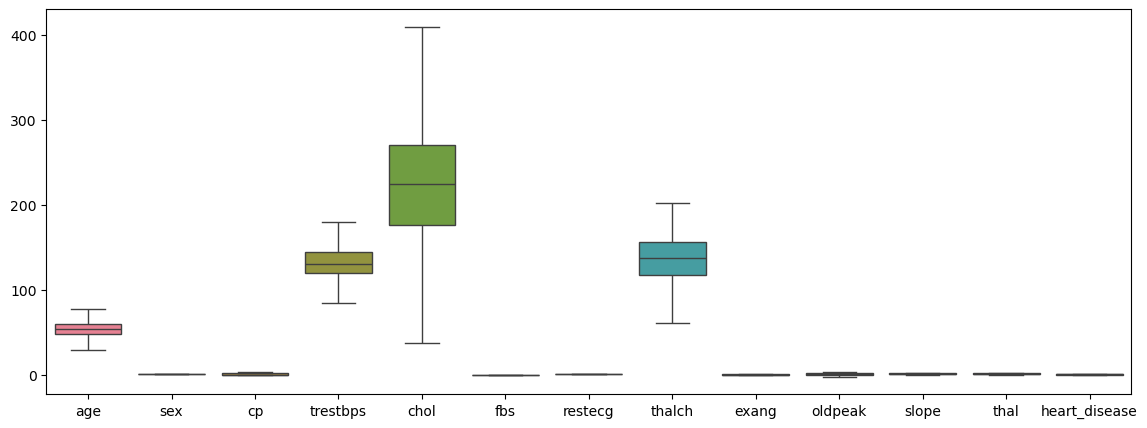

In [214]:
plt.figure(figsize=(14,5))
sns.boxplot(data)

**Observations :**
* Here we have treated the outliers for the columns using IQR technique.
* The range of the data is varying from different columns, some columns have very high range data and some columns have the data in the same range.
* We will scale this data to some standard scale using Standard scaler

### Standardizing Data 

In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
sc = StandardScaler()

In [217]:
features_to_scale = ['age', 'trestbps', 'chol', 'thalch']
data[features_to_scale] = sc.fit_transform(data[features_to_scale])

**Obervation :**
* As we can see from the bo plot, the features age, trestbps, chol and thalch have different range of data
* The range chol, and thal ch features is very high
* So we will apply the standard scaling on only these selected features as other features we have encoded with the label encoder these features does not required to be standardized.

In [218]:
print(f"Min Values: \n {data.min()}")
print(f"Max Values: \n {data.max()}")
print(f"Mean Values: \n {data.mean()}")
print(f"Std Values: \n {data.std()}")

Min Values: 
 age             -2.668006
sex              1.000000
cp               0.000000
trestbps        -2.554873
chol            -1.760808
fbs              0.000000
restecg          1.000000
thalch          -2.798297
exang            0.000000
oldpeak         -2.250000
slope            0.000000
thal             0.000000
heart_disease    0.000000
dtype: float64
Max Values: 
 age              2.535845
sex              1.000000
cp               3.000000
trestbps         2.421845
chol             2.091677
fbs              0.000000
restecg          1.000000
thalch           2.465438
exang            1.000000
oldpeak          3.750000
slope            2.000000
thal             2.000000
heart_disease    1.000000
dtype: float64
Mean Values: 
 age              4.695216e-17
sex              1.000000e+00
cp               7.775330e-01
trestbps         4.538709e-16
chol             1.408565e-16
fbs              0.000000e+00
restecg          1.000000e+00
thalch          -3.130144e-16
exang      

**Observatios :**
* After scaling the data to standard format using standard scaler, we can see the the data is scaled between the range of min range -3 to max range +3 for the features we have applied stardard scaling
* The mean of all standradized features is nearly 0
* The standard deviaton of standardized features is 1

* The data is ready for further process for model building, now we will split the data into train and test and use the trained data to train the model and test data to test the model

### Train Test Split

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
## Separating features and target feature for train test split 
X = data.iloc[:,:-1]
y = data['heart_disease']

In [221]:
X, y

(          age  sex   cp  trestbps      chol  fbs  restecg    thalch  exang  \
 0    1.006104  1.0  3.0  0.607417  0.264845  0.0      1.0  0.524203    0.0   
 1   -1.397775  1.0  1.0  0.089009 -0.045006  0.0      1.0 -0.147763    0.0   
 2    0.350500  1.0  0.0  0.348213 -0.158618  0.0      1.0  0.449540    0.0   
 3   -0.195836  1.0  3.0 -0.792285 -0.220589  0.0      1.0  2.017461    0.0   
 4    0.350500  1.0  0.0 -1.207012 -0.065663  0.0      1.0 -0.371752    1.0   
 ..        ...  ...  ...       ...       ...  ...      ...       ...    ...   
 903 -0.086568  1.0  0.0 -0.429400 -1.760808  0.0      1.0 -0.595741    0.0   
 904  0.896837  1.0  0.0  1.696074 -0.385843  0.0      1.0 -0.595741    1.0   
 905  0.241233  1.0  2.0  1.903437 -1.760808  0.0      1.0 -0.483747    1.0   
 906  0.241233  1.0  2.0  0.555576  0.006636  0.0      1.0 -1.155713    1.0   
 907  0.350500  1.0  0.0  0.451894  0.719294  0.0      1.0  1.718809    0.0   
 
       oldpeak  slope  thal  
 0    2.300000    0.

In [222]:
## Applying train test split 

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [224]:
X_train

age  sex   cp  trestbps      chol  fbs  restecg    thalch  exang  \
84  -1.288508  1.0  1.0 -0.688604  0.905205  0.0      1.0  0.972180    0.0   
10  -2.599714  1.0  3.0  1.903437  0.306159  0.0      1.0  1.270832    0.0   
617  2.208043  1.0  2.0  0.348213  0.306159  0.0      1.0 -1.566359    0.0   
250 -1.397775  1.0  0.0 -1.518057 -1.760808  0.0      1.0 -0.931724    0.0   
869 -0.523637  1.0  2.0  0.192690 -0.675037  0.0      1.0 -2.536977    0.0   
..        ...  ...  ...       ...       ...  ...      ...       ...    ...   
106  1.006104  1.0  2.0  0.089009  0.461085  0.0      1.0  1.345495    0.0   
270 -1.834844  1.0  1.0 -0.688604  0.543712  0.0      1.0 -0.222426    0.0   
860 -0.632904  1.0  0.0  0.348213  1.721147  0.0      1.0  0.860186    1.0   
435  0.350500  1.0  1.0  1.073984  0.254517  0.0      1.0  1.046843    0.0   
102  0.678302  1.0  3.0  0.866621  0.337144  0.0      1.0  1.308163    0.0   

      oldpeak  slope  thal  
84   0.000000    2.0   1.0  
10   0.000000    0.0   0.0  
617  0.000000    2.0   0.0  
250  0.000000    1.0   1.0  
869  0.891253    1.0   0.0  
..        ...    ...   ...  
106  0.000000    2.0   1.0  
270  0.000000    0.0   0.0  
860  1.500000    2.0   2.0  
435  0.000000    2.0   1.0  
102  0.900000    2.0   1.0  

[726 rows x 12 columns]

In [225]:
y_train

84     0.0
10     0.0
617    1.0
250    0.0
869    1.0
      ... 
106    0.0
270    0.0
860    1.0
435    1.0
102    0.0
Name: heart_disease, Length: 726, dtype: float64

## Model Building - Decision Tree Classifier

In [226]:
from sklearn.tree import DecisionTreeClassifier

In [227]:
treemodel = DecisionTreeClassifier()

In [228]:
treemodel

DecisionTreeClassifier()

**Observations :**
* Here we initialized a decision tree classifier with no paramerters
* First we wil initialize the decision tree and after that we will process it with Prepruning process with parameter tuning

In [229]:
print(X_train.shape)
print(X_train.dtypes)

(726, 12)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalch      float64
exang       float64
oldpeak     float64
slope       float64
thal        float64
dtype: object


In [230]:
print(y_train.shape)
print(y_train.dtypes)

(726,)
float64


**Observation :** 
* Here we will fit the training data wih the decision tree classifier and plot the decision tree using a tree library inside sklearn

In [266]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

[Text(0.5268013100436681, 0.96875, 'x[2] <= 0.5\ngini = 0.5\nsamples = 726\nvalue = [363.0, 363.0]'),
 Text(0.2881004366812227, 0.90625, 'x[8] <= 0.5\ngini = 0.388\nsamples = 408\nvalue = [100.703, 280.976]'),
 Text(0.13777292576419214, 0.84375, 'x[4] <= -1.512\ngini = 0.486\nsamples = 167\nvalue = [67.916, 95.113]'),
 Text(0.034934497816593885, 0.78125, 'x[0] <= 0.897\ngini = 0.14\nsamples = 52\nvalue = [3.513, 42.757]'),
 Text(0.02096069868995633, 0.71875, 'x[3] <= -1.492\ngini = 0.064\nsamples = 40\nvalue = [1.171, 34.031]'),
 Text(0.013973799126637555, 0.65625, 'x[3] <= -1.622\ngini = 0.334\nsamples = 6\nvalue = [1.171, 4.363]'),
 Text(0.0069868995633187774, 0.59375, 'gini = 0.0\nsamples = 5\nvalue = [0.0, 4.363]'),
 Text(0.02096069868995633, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1.171, 0.0]'),
 Text(0.02794759825327511, 0.65625, 'gini = 0.0\nsamples = 34\nvalue = [0.0, 29.668]'),
 Text(0.04890829694323144, 0.71875, 'x[11] <= 1.5\ngini = 0.334\nsamples = 12\nvalue = [2.342, 8

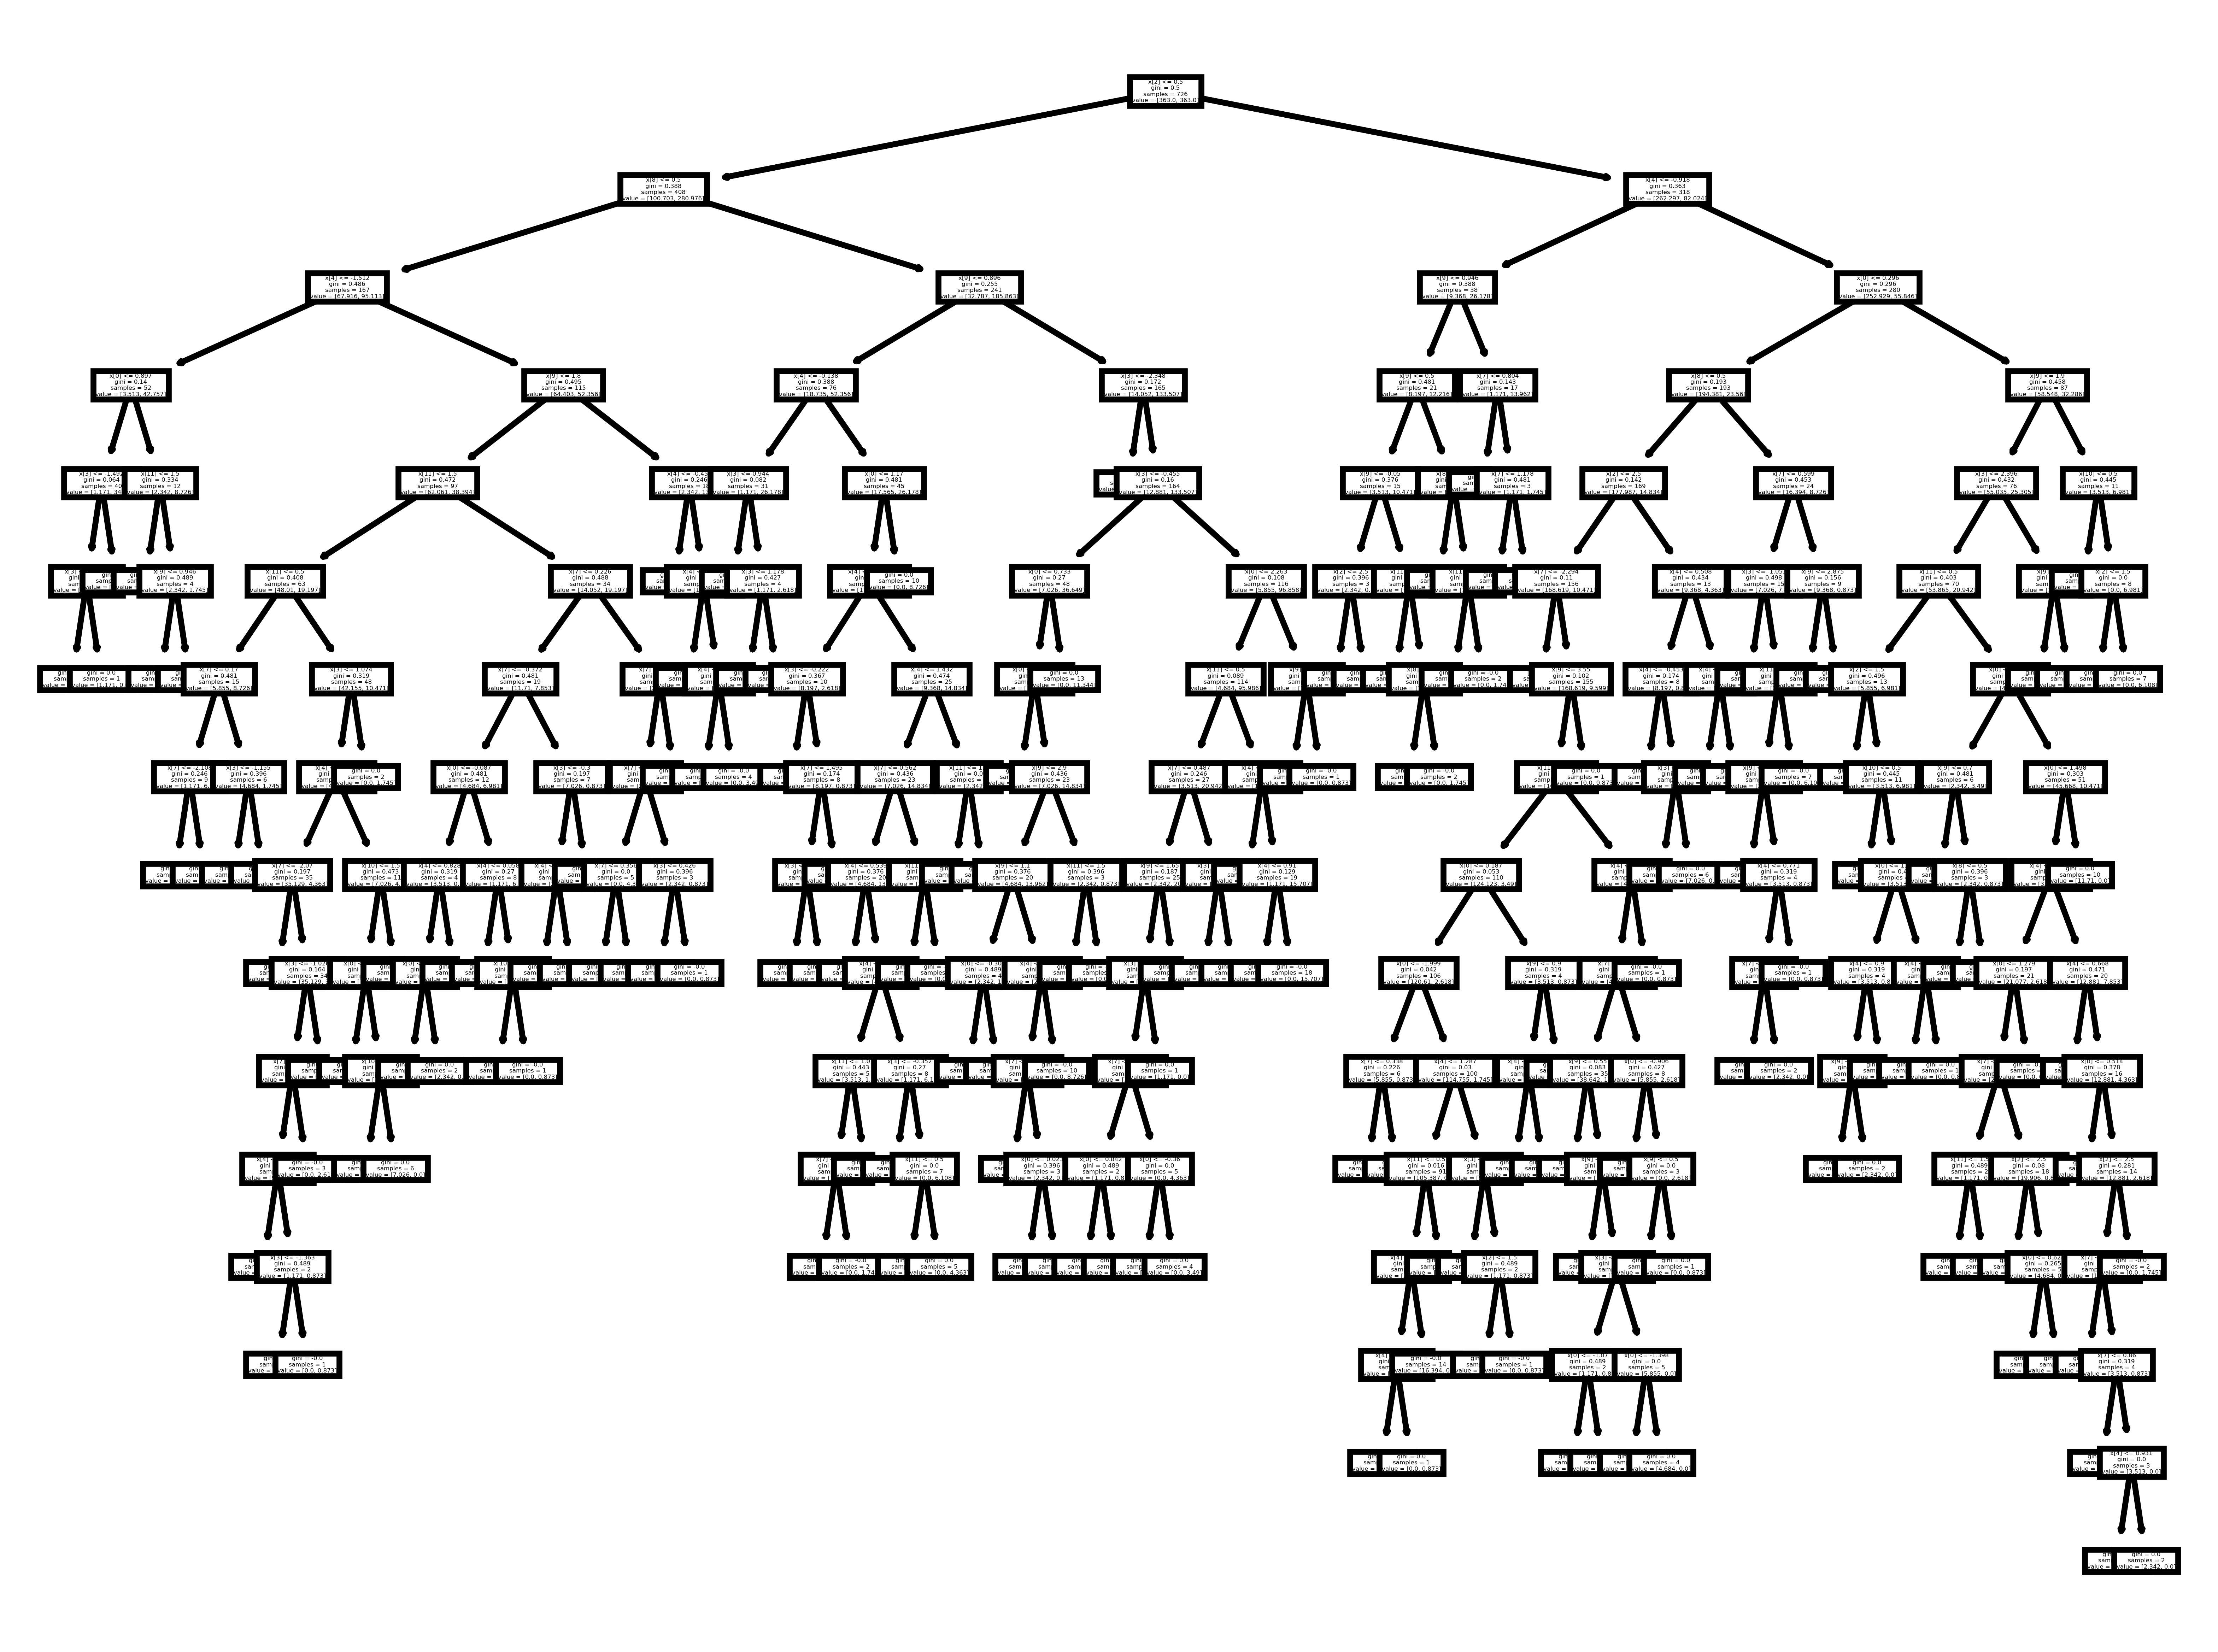

In [267]:
from sklearn import tree
plt.figure(dpi=1200)
tree.plot_tree(treemodel)

In [233]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'heart_disease'],
      dtype='object')

[Text(0.5044210271317829, 0.96875, 'cp <= 0.5\ngini = 0.489\nsamples = 726\nvalue = [310, 416]\nclass = 1'),
 Text(0.27507267441860467, 0.90625, 'exang <= 0.5\ngini = 0.333\nsamples = 408\nvalue = [86, 322]\nclass = 1'),
 Text(0.13202519379844962, 0.84375, 'chol <= -1.512\ngini = 0.453\nsamples = 167\nvalue = [58, 109]\nclass = 1'),
 Text(0.03875968992248062, 0.78125, 'age <= 0.897\ngini = 0.109\nsamples = 52\nvalue = [3, 49]\nclass = 1'),
 Text(0.023255813953488372, 0.71875, 'trestbps <= -1.492\ngini = 0.049\nsamples = 40\nvalue = [1, 39]\nclass = 1'),
 Text(0.015503875968992248, 0.65625, 'thalch <= -0.726\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = 1'),
 Text(0.007751937984496124, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.023255813953488372, 0.59375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 1'),
 Text(0.031007751937984496, 0.65625, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]\nclass = 1'),
 Text(0.05426356589147287, 0.71875, 'thal <= 1.5\n

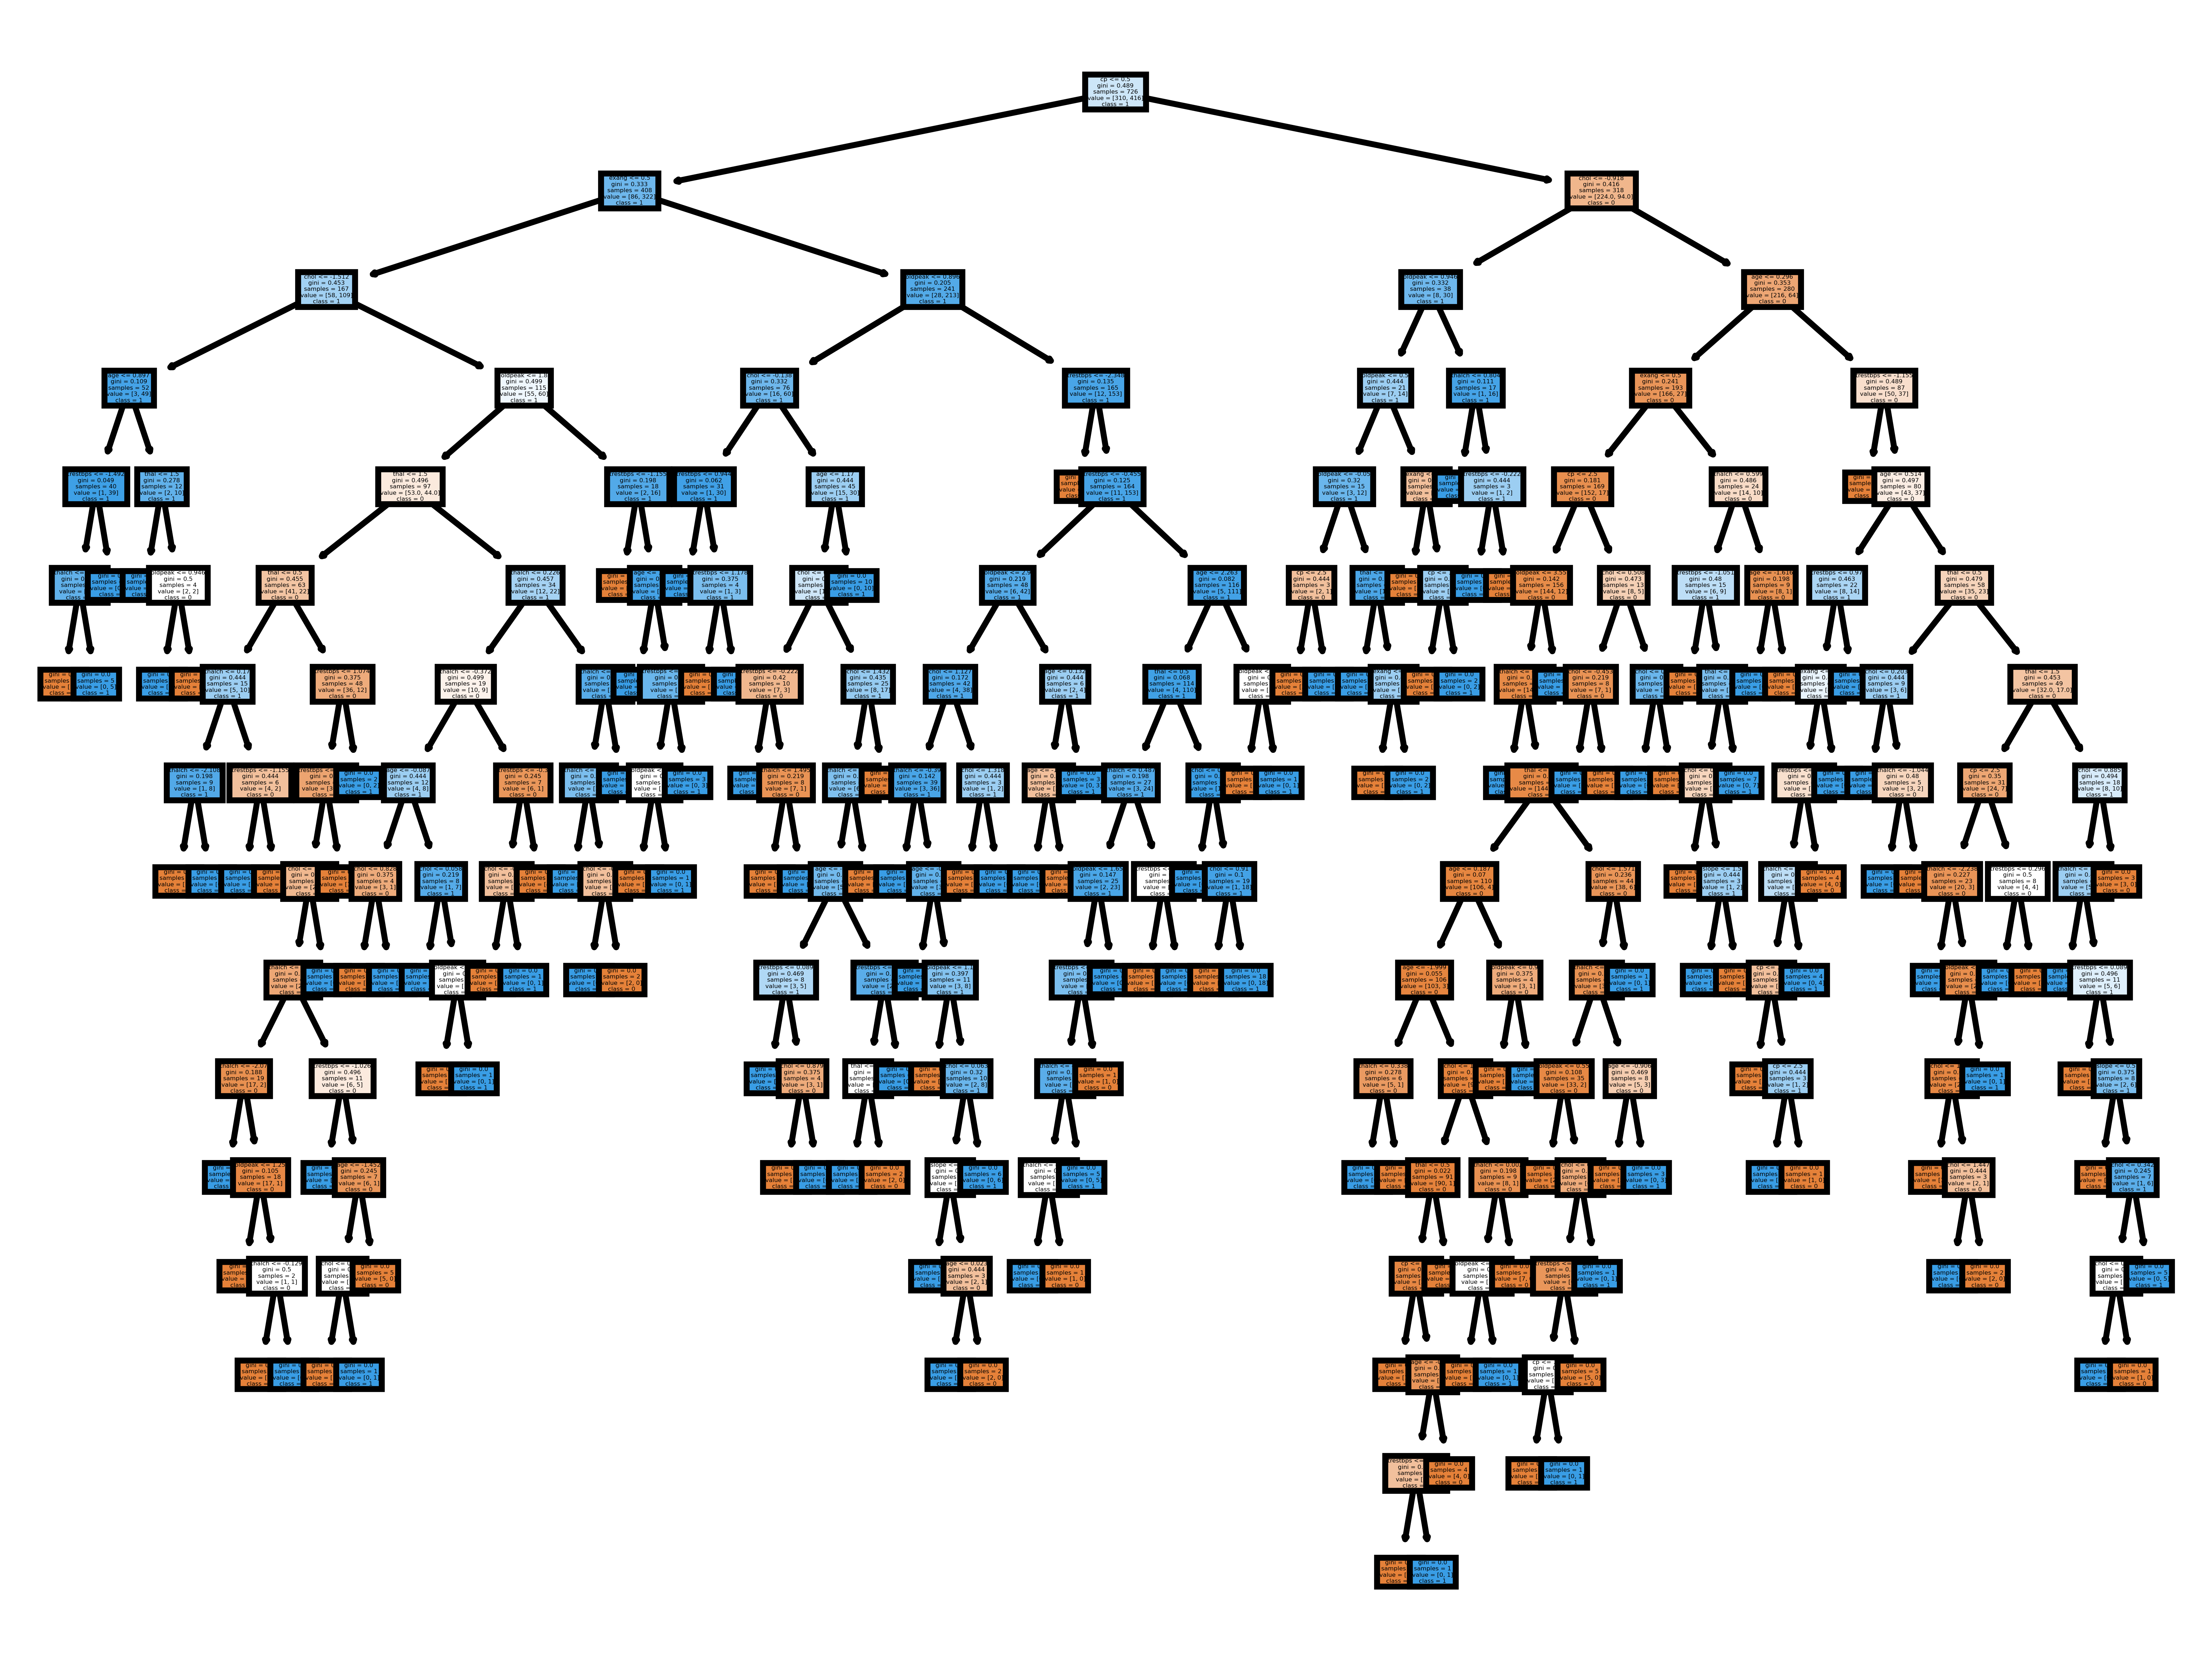

In [235]:
# labeling the feature names and class names inside the decision tree
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal']
cn=['0','1']
from sklearn import tree
plt.figure(dpi=1200)
tree.plot_tree(treemodel, feature_names=fn, class_names=cn, filled=True)

In [236]:
y_pred = treemodel.predict(X_test)

In [237]:
y_pred

array([1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.])

### Model Evaluation and Analysis

**Key Insights :**
* Precison, recall, f1 and roc-auc scores for the binary classification models

In [238]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [239]:
# Calculating probability for ROC AUC score

In [264]:
y_prob = treemodel.predict_proba(X_test)[:,1]

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [265]:
## Evaluation Matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [242]:
print(f"Evaluations Matrics:")
print(f"Accuracy Score : {accuracy:.4f}")
print(f"Precision Score : {precision:.4f}")
print(f"Recall Score : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC-AUC Score : {roc_auc:.4f}")
print("\n Confusion Matrics :")
cm = confusion_matrix(y_test,y_pred)
print(f"\n {cm}")
print("\n Classification Report :")
clreport = classification_report(y_test, y_pred)
print(f"\n {clreport}")

Evaluations Matrics:
Accuracy Score : 0.7582
Precision Score : 0.7634
Recall Score : 0.7634
F1 Score : 0.7634
ROC-AUC Score : 0.7581

 Confusion Matrics :

 [[67 22]
 [22 71]]

 Classification Report :

               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        89
         1.0       0.76      0.76      0.76        93

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182



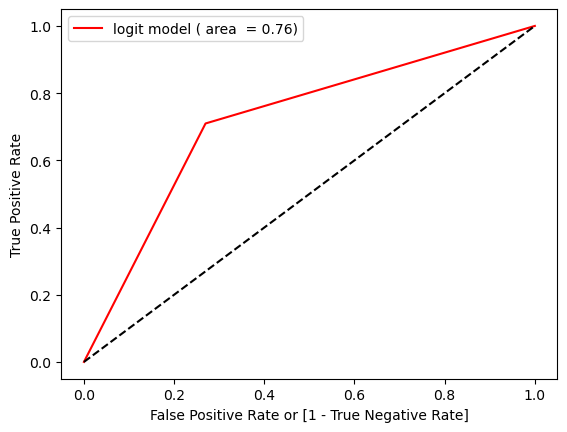

In [275]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, treemodel.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [276]:
auc

0.7581249244895494

In [243]:
y_train_pred = treemodel.predict(X_train)
y_test_pred = treemodel.predict(X_test)

In [244]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [245]:
print(f"Training Accuracy : {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")

Training Accuracy : 1.0000
Testing Accuracy : 0.7582


**Observations :**
* From the training and testing accuracy we can see the model is giving high accuracy for trainng set and low accuracy for testing.
* The model is overfitting, high variance and low bias
* It is not generalized for test data or new data

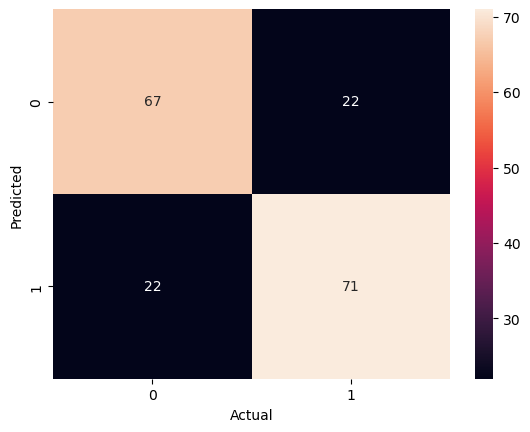

In [246]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Observaton :** 
* We can see the relationship between the actual and predicted counts

## Hyper parameter tuning

**Key Insights :**
* We will set parameters and make hyper parameter tuning on the model using cross valdations technique
* We will use grid search cv method to find the best combination of parameters to classify the model
* We will use ccp_alpha (Cost Complexity Pruning Alpha) this parameter controls post-pruning of the decision tree to reduce overfitting, helps by removing branches that don’t improve generalization.
* We can find the ccp_alpha values by using below function and use some of them in hyper parameter tuning.
* Also we will play with some more important parameters such as max_depth, criterion, splitter, max_features, min_samples_split etc to get the best parameters combinations to avoid the overfitting 

In [247]:
path = treemodel.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00089991, 0.00118064, 0.00118064, 0.00118064,
        0.00118064, 0.00118064, 0.00118162, 0.00120523, 0.00122436,
        0.00122436, 0.00124623, 0.00126263, 0.00127388, 0.00128007,
        0.00129639, 0.00129639, 0.00130089, 0.00130478, 0.00131182,
        0.00133298, 0.00134298, 0.00141677, 0.00159167, 0.00170057,
        0.00177096, 0.00183655, 0.00183655, 0.00183655, 0.00195898,
        0.00203617, 0.00206612, 0.00220386, 0.00220386, 0.00224977,
        0.00226072, 0.00228143, 0.00230469, 0.0023279 , 0.00238313,
        0.00241047, 0.00241047, 0.00244873, 0.00245026, 0.00252525,
        0.00258786, 0.00275482, 0.00276919, 0.00286961, 0.00306091,
        0.00310803, 0.00316444, 0.00330579, 0.00334169, 0.003367  ,
        0.00349589, 0.00350049, 0.0035662 , 0.0037037 , 0.00374696,
        0.00379302, 0.0054314 , 0.00578381, 0.00792462, 0.01345527,
        0.01598221, 0.02899895, 0.11995721]),
 'impurities': array([0.        , 0.00539945, 0.00776072

In [248]:
alphas = path["ccp_alphas"]
alphas

array([0.        , 0.00089991, 0.00118064, 0.00118064, 0.00118064,
       0.00118064, 0.00118064, 0.00118162, 0.00120523, 0.00122436,
       0.00122436, 0.00124623, 0.00126263, 0.00127388, 0.00128007,
       0.00129639, 0.00129639, 0.00130089, 0.00130478, 0.00131182,
       0.00133298, 0.00134298, 0.00141677, 0.00159167, 0.00170057,
       0.00177096, 0.00183655, 0.00183655, 0.00183655, 0.00195898,
       0.00203617, 0.00206612, 0.00220386, 0.00220386, 0.00224977,
       0.00226072, 0.00228143, 0.00230469, 0.0023279 , 0.00238313,
       0.00241047, 0.00241047, 0.00244873, 0.00245026, 0.00252525,
       0.00258786, 0.00275482, 0.00276919, 0.00286961, 0.00306091,
       0.00310803, 0.00316444, 0.00330579, 0.00334169, 0.003367  ,
       0.00349589, 0.00350049, 0.0035662 , 0.0037037 , 0.00374696,
       0.00379302, 0.0054314 , 0.00578381, 0.00792462, 0.01345527,
       0.01598221, 0.02899895, 0.11995721])

**Key Insights :**
* We set parameters for the gridsearhcv which cross validates the models using the combiantions of the parameters and find the best parameters for model.

In [249]:
## Preprunning
parameters = { 
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,10,15,None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'ccp_alpha': [0.0,0.00529376,0.01265698, 0.00529376, 0.07988527],
}

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
treemodel = DecisionTreeClassifier(class_weight='balanced', random_state=42)
cv = GridSearchCV(treemodel, param_grid=parameters, cv=5, scoring='accuracy')

In [252]:
cv.fit(X_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3600 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-package

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.00529376, 0.01265698, 0.00529376,
                                       0.07988527],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [253]:
cv.best_params_

{'ccp_alpha': 0.00529376,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'splitter': 'random'}

**Observations :**
* Best params gives best parameter combination for the building the model with above ccp_alpha value, gini as criteria with max depth as 15 etc.

In [254]:
y_pred_cv = cv.predict(X_test)

In [255]:
# Evaluation

In [256]:
y_prob_cv = cv.predict_proba(X_test)[:,1]

In [257]:
## Evaluation Matrix
accuracy = accuracy_score(y_test, y_pred_cv)
precision = precision_score(y_test, y_pred_cv)
recall = recall_score(y_test, y_pred_cv)
f1 = f1_score(y_test, y_pred_cv)
roc_auc = roc_auc_score(y_test, y_prob_cv)

In [258]:
print(f"Evaluations Matrics:")
print(f"Accuracy Score : {accuracy:.4f}")
print(f"Precision Score : {precision:.4f}")
print(f"Recall Score : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC-AUC Score : {roc_auc:.4f}")
print("\n Confusion Matrics :")
cm = confusion_matrix(y_test,y_pred)
print(f"\n {cm}")
print("\n Classification Report :")
clreport = classification_report(y_test, y_pred)
print(f"\n {clreport}")

Evaluations Matrics:
Accuracy Score : 0.7418
Precision Score : 0.7500
Recall Score : 0.7419
F1 Score : 0.7459
ROC-AUC Score : 0.7970

 Confusion Matrics :

 [[67 22]
 [22 71]]

 Classification Report :

               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        89
         1.0       0.76      0.76      0.76        93

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182



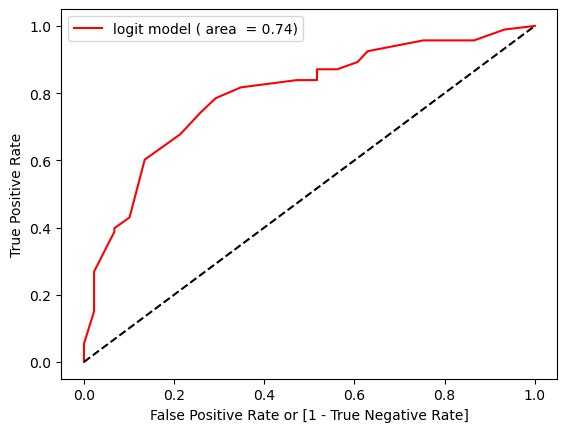

In [259]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, cv.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred_cv)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [277]:
auc

0.7581249244895494

In [260]:
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)

In [261]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [262]:
print(f"Training Accuracy : {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")

Training Accuracy : 0.7851
Testing Accuracy : 0.7418


In [271]:
best_tree = cv.best_estimator_

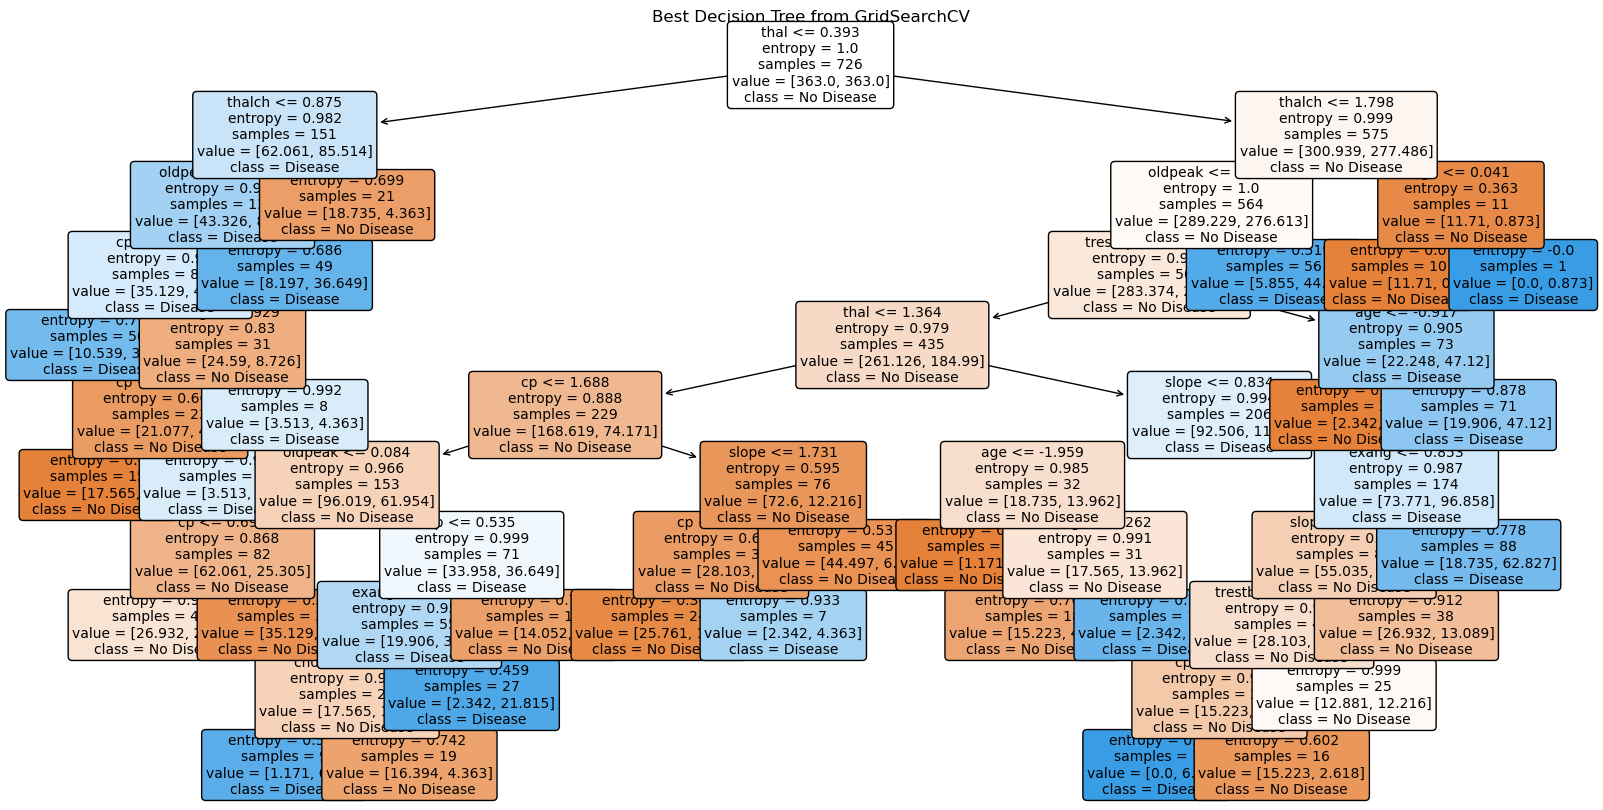

In [274]:
# labeling the feature names and class names inside the decision tree
from sklearn import tree
#plt.figure(dpi=1200)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    best_tree,
    filled=True,
    feature_names=X_train.columns,   # if using DataFrame
    class_names=['No Disease', 'Disease'],  # for binary classification
    rounded=True,
    fontsize=10
)
plt.title("Best Decision Tree from GridSearchCV")
plt.show()

**Observations :**
* After hyperparameter tuning and cross validation we can get the best combination of parameters which create a good decision tree
* Using the hyperparameter tuning we had overcome to the overfitting problem
* The low bias and low variance model is a generalized model, which accurately predicts make the predictions on the new unseen data.